🎯 Desafio dia 90 — Aluguel de Imóveis

📂 Dataset: desafio_dia_90_aluguel_imoveis.csv

🔍 Contexto: Uma plataforma de aluguel de imóveis deseja entender os fatores que mais impactam no valor do aluguel nas principais capitais brasileiras.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em area_m2 com a mediana agrupada por tipo_imovel.

- Preencha os valores ausentes em preco_aluguel com a média geral.

📊 Análise geral
- Qual cidade apresenta o maior preço médio de aluguel por m²?

- Existe diferença no preço médio entre imóveis mobiliados e não mobiliados por cidade? (faça um groupby duplo)

📈 Visualização de dados
- Crie um boxplot com preco_aluguel por tipo_imovel, colorido por mobilhado.

🤖 Machine Learning - Regressão com Explicação
- Crie um modelo para prever preco_aluguel com base em:

    cidade, tipo_imovel, mobilhado, area_m2

    Use:

    train_test_split, get_dummies, RandomForestRegressor

    Avalie com mean_squared_error

    Adicional: use feature_importances_ para listar as variáveis mais importantes do modelo

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_90_aluguel_imoveis.csv")
df.head()

,id_imovel,cidade,tipo_imovel,mobilhado,area_m2,preco_aluguel
0,3000,Curitiba,Kitnet,Não,49.5,2403.00
1,3001,Porto Alegre,Casa,Não,80.8,1352.58
2,3002,Belo Horizonte,Studio,Não,64.4,2931.24
3,3003,Curitiba,Kitnet,Não,70.0,1786.92
4,3004,Recife,Apartamento,Não,52.0,NaN


In [3]:
#Preencha os valores ausentes em area_m2 com a mediana agrupada por tipo_imovel.
df["area_m2"] = df["area_m2"].fillna(
    df.groupby("tipo_imovel")["area_m2"].transform("median")
)
df["area_m2"].isna().sum()

0

In [4]:
#Preencha os valores ausentes em preco_aluguel com a média geral.
df["preco_aluguel"] = df["preco_aluguel"].fillna(df["preco_aluguel"].mean())
df["preco_aluguel"].isna().sum()

0

In [6]:
#Qual cidade apresenta o maior preço médio de aluguel por m²?
df["preco_m2"] = df["preco_aluguel"] / df["area_m2"]

cidade_maior_preco_aluguelm2 = df.groupby("cidade")["preco_m2"].mean().sort_values(ascending=False)
print(cidade_maior_preco_aluguelm2)

cidade
São Paulo         44.375950
Rio de Janeiro    42.996055
Recife            42.239750
Curitiba          40.624964
Porto Alegre      37.677854
Belo Horizonte    35.837970
Name: preco_m2, dtype: float64


In [9]:
#Existe diferença no preço médio entre imóveis mobiliados e não mobiliados por cidade? (faça um groupby duplo)
diferenca_mobiliados = df.groupby(["cidade", "mobilhado"])["preco_aluguel"].mean().unstack()
print(diferenca_mobiliados.round(2))

mobilhado           Não      Sim
cidade                          
Belo Horizonte  2168.46  2305.29
Curitiba        2110.59  2135.37
Porto Alegre    2076.68  2027.56
Recife          2454.36  2140.70
Rio de Janeiro  2235.37  2322.93
São Paulo       2475.44  2591.00


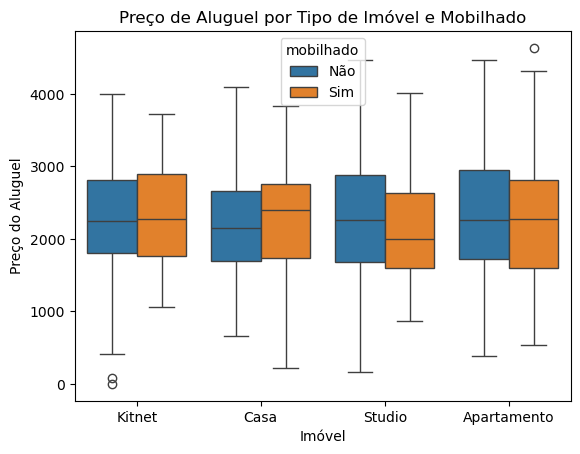

In [13]:
#Crie um boxplot com preco_aluguel por tipo_imovel, colorido por mobilhado.
sns.boxplot(df, x="tipo_imovel", y="preco_aluguel", hue="mobilhado")
plt.title("Preço de Aluguel por Tipo de Imóvel e Mobilhado")
plt.xlabel("Imóvel")
plt.ylabel("Preço do Aluguel")
plt.show()

In [22]:
#Crie um modelo para prever preco_aluguel com base em:
X = df[["cidade", "tipo_imovel", "mobilhado", "area_m2"]]
y = df["preco_aluguel"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred),"\n")

importances = pd.Series(modelo.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

698024.0780223596 

area_m2                    0.605095
tipo_imovel_Apartamento    0.039157
tipo_imovel_Studio         0.038773
cidade_Belo Horizonte      0.038018
tipo_imovel_Casa           0.036729
tipo_imovel_Kitnet         0.036182
cidade_São Paulo           0.034663
cidade_Recife              0.030962
cidade_Porto Alegre        0.030811
mobilhado_Sim              0.029098
mobilhado_Não              0.028860
cidade_Curitiba            0.026974
cidade_Rio de Janeiro      0.024677
dtype: float64
